In [1]:
# pip install -U tensorly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 2.5 MB/s eta 0:00:00


In [44]:
import tensorflow as tf
import tensorly as tl
from tensorly.decomposition import parafac
from tensorly.decomposition import tucker
from tensorly import tt_to_tensor
from tensorly.decomposition import tensor_train
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
from tqdm.notebook import tqdm
from sklearn.decomposition import PCA

# Basic latent factor analysis with CP decomposition

In [74]:
# Create a RGB tensor
tensor = np.array([[[1, 1, 1],[1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 0, 1]],

                    [[0, 1, 1],[0, 1, 1], [1, 1, 0.8], [0, 1, 1], [0, 1, 1]],
                   [[0, 1, 1],[0, 1, 1], [1, 1, 0.8], [0, 1, 1], [0, 1, 1]],
                    [[0, 1, 1],[0, 1, 1], [1, 1, 0.8], [0, 1, 1], [0, 1, 1]],
                   [[0, 1, 1],[0, 1, 1], [1, 1, 0.8], [0, 1, 1], [0, 1, 1]],
                   [[0, 1, 1],[0, 1, 1], [1, 1, 0.8], [0, 1, 1], [0, 1, 1]],

                     [[0, 0.5, 0],[0, 0.5, 0], [1, 1, 0.8], [0.3, 0.5, 0.2], [0.3, 0.5, 0.2]],

                   [[1, 0.5, 0],[1, 0.5, 0], [1, 1, 0.8], [0.3, 0.5, 0.2], [0.3, 0.5, 0.2]],

                   [[0.2, 1, 0],[1, 1, 0], [1, 1, 0.8], [1, 0.3, 0.5], [1, 0.3, 0.5]],
                   [[0.2, 1, 0],[1, 1, 0], [1, 1, 0.8], [1, 0.3, 0.5], [1, 0.3, 0.5]],
                   [[0.2, 1, 0],[1, 1, 0], [1, 1, 0.8], [1, 0.3, 0.5], [1, 0.3, 0.5]],
                   [[0.2, 1, 0],[1, 1, 0], [1, 1, 0.8], [1, 0.3, 0.5], [1, 0.3, 0.5]],
                   [[0.2, 1, 0],[1, 1, 0], [1, 1, 0.8], [1, 0.3, 0.5], [1, 0.3, 0.5]],
                   [[0.2, 1, 0],[1, 1, 0], [1, 1, 0.8], [1, 0.3, 0.5], [1, 0.3, 0.5]]
                  ])



(14, 5, 3)


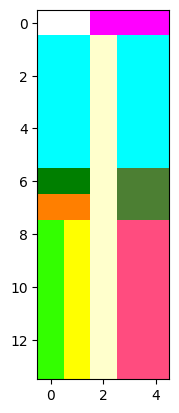

In [75]:
# Visualize the tensor
print(tensor.shape)
plt.imshow(tensor)

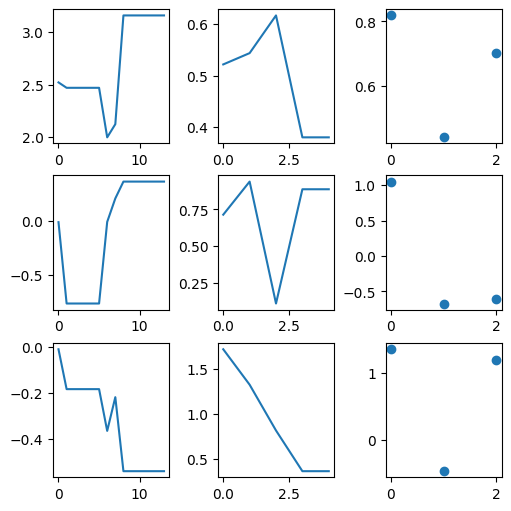

In [76]:
# Get the matrix factors of CP decomposition
factors = parafac(tensor, rank=3)

# Plot the factors
# Each column is an order -> y-axis, x-axis, RGB
# Each row is a factor (rank)
fig, axs = plt.subplots(3, 3, figsize=(5, 5), constrained_layout=True)
axs[0,0].plot(factors[1][0][:, 0])
axs[1,0].plot(factors[1][0][:, 1])
axs[2,0].plot(factors[1][0][:, 2])


axs[0,1].plot(factors[1][1][:, 0])
axs[1,1].plot(factors[1][1][:, 1])
axs[2,1].plot(factors[1][1][:, 2])


axs[0,2].scatter(range(0,3), factors[1][2][:, 0])
axs[1,2].scatter(range(0,3), factors[1][2][:, 1])
axs[2,2].scatter(range(0,3), factors[1][2][:, 2])

plt.show()

[0.80858865 0.17320475]
[2.27748293 1.05407425]


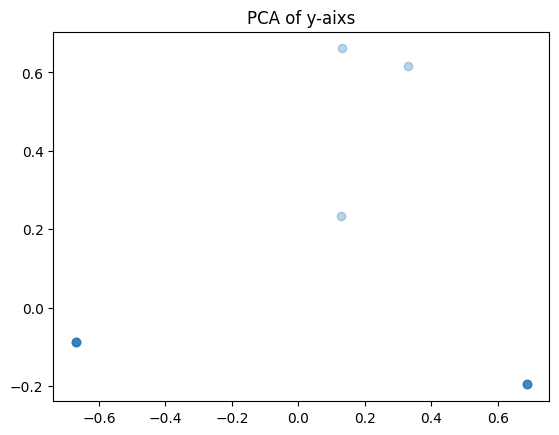

In [77]:
# Conduct PCA on factor matrix for y-axis

pca = PCA(n_components=2)
# pca for y-axis
res = pca.fit_transform(factors[1][0])
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
plt.scatter(res[:,0],res[:,1], alpha=0.3)
plt.title('PCA of y-aixs')
plt.savefig('PCA of y-axis')
plt.show()

Five blocks. Shade indicates the length/area of the blocks.
i.e. Three small blocks, two large blocks.

[0.73948387 0.2572513 ]
[1.19571483 0.70524831]


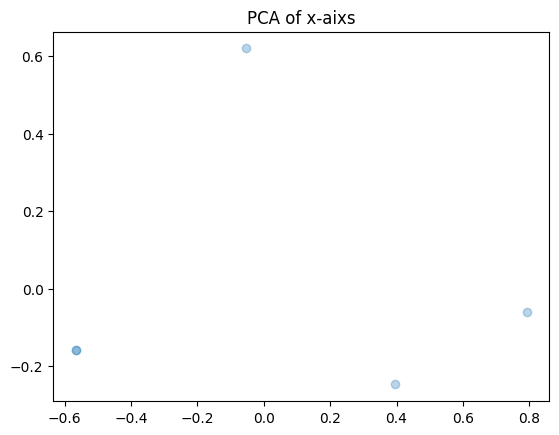

In [78]:
# Conduct PCA on factor matrix for x-axis

pca = PCA(n_components=2)
# PCA for x-axis
res = pca.fit_transform(factors[1][1])
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
plt.scatter(res[:,0],res[:,1], alpha=0.3)
plt.title('PCA of x-aixs')
plt.savefig('PCA of x-axis')
plt.show()

4 blocks. 1 large, 4 small.

# Runtime comparison for CPD & Tensor Train with random generated tensors

### Runtime vs Order

In [67]:
time_cp_lst = []
time_tt_lst = []
time_tucker_lst = []
order_lst = np.arange(2, 13)

def order_vs_time(order, rank, method):
  duration_lst = []
  for i in range(3):
    tensor = np.random.random(tuple([5]*order))
    if method == 'cp':
      start = time.time()

      factors = parafac(tensor, rank)
      tensor_rec = tl.kruskal_to_tensor(factors)


    elif method == 'tt':
      start = time.time()

      factors = tensor_train(tensor, rank=rank)
      tensor_rec = tl.tt_to_tensor(factors)


    duration = time.time()-start
    duration_lst.append(duration)

  return np.mean(duration_lst)

for order in tqdm(order_lst):
  time_cp_lst.append(order_vs_time(order, rank=3, method = 'cp'))
  time_tt_lst.append(order_vs_time(order, rank=3, method = 'tt'))

  0%|          | 0/11 [00:00<?, ?it/s]

[ 1.17780125 -9.070754  ]
[  1.55139596 -15.56112011]


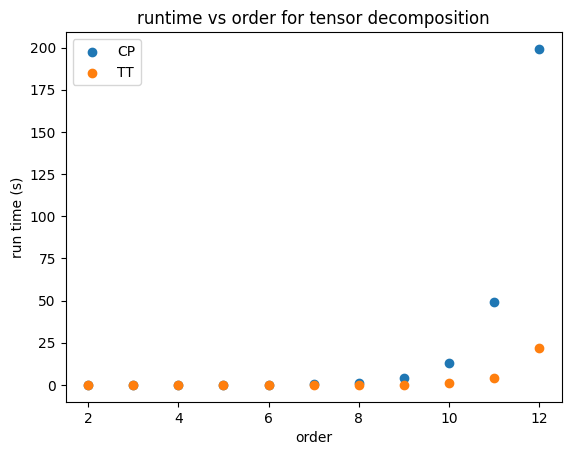

In [68]:
time_cp_lst = np.array(time_cp_lst)
time_tt_lst = np.array(time_tt_lst)


ylog_data_cp = np.log(time_cp_lst)
ylog_data_tt = np.log(time_tt_lst)

curve_fit_cp = np.polyfit(order_lst[5:], ylog_data_cp[5:], 1)
print(curve_fit_cp)

curve_fit_tt = np.polyfit(order_lst[5:], ylog_data_tt[5:], 1)
print(curve_fit_tt)

y_cp = np.exp(curve_fit_cp[1]) * np.exp(curve_fit_cp[0]*order_lst[5:])
y_tt = np.exp(curve_fit_tt[1]) * np.exp(curve_fit_tt[0]*order_lst[5:])



plt.scatter(order_lst, time_cp_lst, label='CP')
# plt.plot(order_lst[5:], y_cp, label='CP fit')
plt.scatter(order_lst, time_tt_lst, label='TT')
# plt.plot(order_lst[5:], y_tt, label='TT fit')
plt.xlabel('order')
plt.ylabel('run time (s)')
plt.title('runtime vs order for tensor decomposition')
plt.legend()
plt.savefig('runtime vs order for tensor decomposition', dpi=400, bbox_inches='tight')

### CPU time vs Order

In [70]:
time_cp_lst = []
time_tt_lst = []
time_tucker_lst = []
order_lst = np.arange(2, 13)

def order_vs_time(order, rank, method):
  duration_lst = []
  for i in range(3):
    tensor = np.random.random(tuple([5]*order))
    if method == 'cp':
      start = time.time()

      factors = parafac(tensor, rank)
      tensor_rec = tl.kruskal_to_tensor(factors)


    elif method == 'tt':
      start = time.time()

      factors = tensor_train(tensor, rank=rank)
      tensor_rec = tl.tt_to_tensor(factors)


    duration = time.process_time()
    duration_lst.append(duration)

  return np.mean(duration_lst)

for order in tqdm(order_lst):
  time_cp_lst.append(order_vs_time(order, rank=3, method = 'cp'))
  time_tt_lst.append(order_vs_time(order, rank=3, method = 'tt'))

  0%|          | 0/11 [00:00<?, ?it/s]

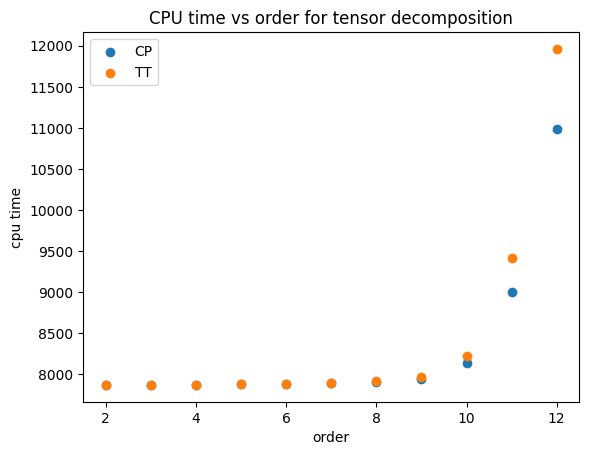

In [71]:
time_cp_lst = np.array(time_cp_lst)
time_tt_lst = np.array(time_tt_lst)

plt.scatter(order_lst, time_cp_lst, label='CP')
plt.scatter(order_lst, time_tt_lst, label='TT')
plt.xlabel('order')
plt.ylabel('cpu time')
plt.title('CPU time vs order for tensor decomposition')
plt.legend()
plt.savefig('CPU time vs order for tensor decomposition', dpi=400, bbox_inches='tight')

### Runtime vs Dimension

In [72]:
time_cp_lst = []
time_tt_lst = []
def dim_vs_time(dim, rank, method):
  duration_lst = []
  for i in range(3):
    tensor = np.random.random(tuple([dim]*5))
    if method == 'cp':
      start = time.time()

      factors = parafac(tensor, rank)
      tensor_rec = tl.kruskal_to_tensor(factors)


    elif method == 'tt':
      start = time.time()

      factors = tensor_train(tensor, rank=rank)
      tensor_rec = tl.tt_to_tensor(factors)


    duration = time.time()-start
    duration_lst.append(duration)

  return np.mean(duration_lst)

dim_range = np.arange(2, 31)
for dim in tqdm(dim_range):
  time_cp_lst.append(dim_vs_time(dim, rank=3, method = 'cp'))
  time_tt_lst.append(dim_vs_time(dim, rank=3, method = 'tt'))

  0%|          | 0/29 [00:00<?, ?it/s]

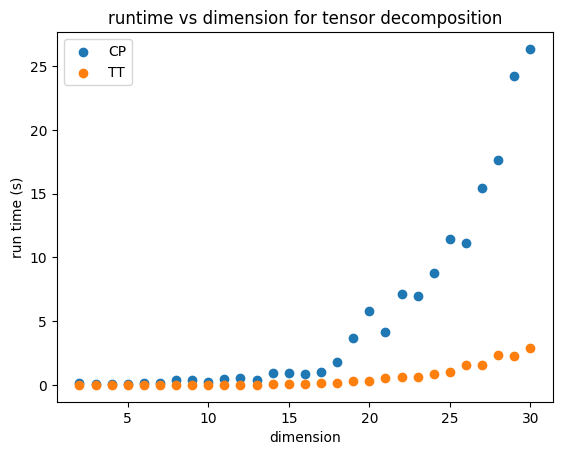

In [73]:
time_cp_lst = np.array(time_cp_lst)
time_tt_lst = np.array(time_tt_lst)

plt.scatter(dim_range, time_cp_lst, label='CP')
plt.scatter(dim_range, time_tt_lst, label='TT')
plt.xlabel('dimension')
plt.ylabel('run time (s)')
plt.title('runtime vs dimension for tensor decomposition')
plt.legend()
plt.savefig('runtime vs dimension for tensor decomposition', dpi=400, bbox_inches='tight')

# EDA of CIFAR-10 dataset

In [79]:
# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


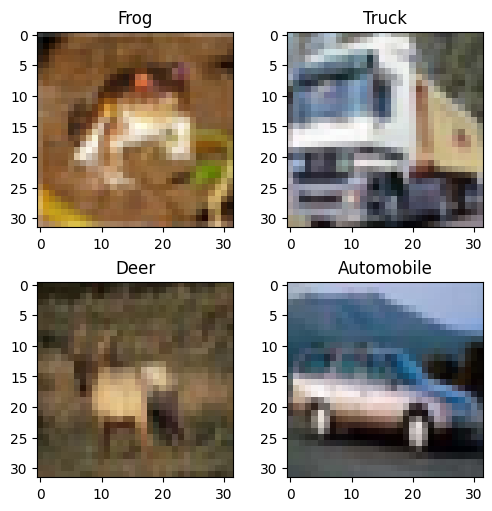

In [88]:
# 0, 1, 3, 4 => 6,9,4,1
fig, axs = plt.subplots(2, 2, figsize=(5, 5), constrained_layout=True)

# Display the first image
axs[0,0].imshow(x_train[0]/255)
axs[0,0].set_title('Frog')

# Display the second image
axs[0,1].imshow(x_train[1]/255)
axs[0,1].set_title('Truck')

axs[1,0].imshow(x_train[3]/255)
axs[1,0].set_title('Deer')

axs[1,1].imshow(x_train[4]/255)
axs[1,1].set_title('Automobile')

plt.savefig('cifar10 normalized.png', dpi=400, bbox_inches='tight')
plt.show()

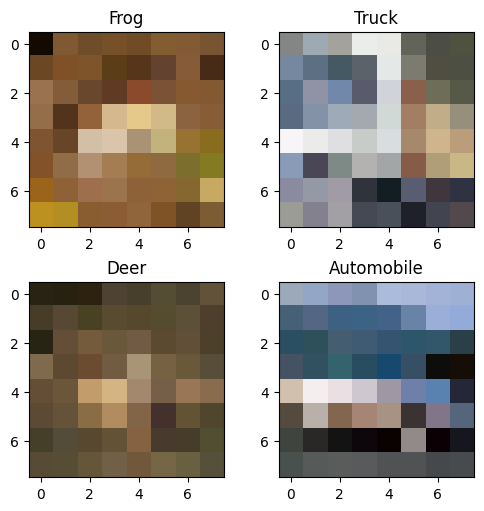

In [90]:
# 0, 1, 3, 4 => 6,9,4,1
fig, axs = plt.subplots(2, 2, figsize=(5, 5), constrained_layout=True)

# Display the first image
axs[0,0].imshow(cv2.resize(x_train[0]/255, (8,8)))
axs[0,0].set_title('Frog')

# Display the second image
axs[0,1].imshow(cv2.resize(x_train[1]/255, (8,8)))
axs[0,1].set_title('Truck')

axs[1,0].imshow(cv2.resize(x_train[3]/255, (8,8)))
axs[1,0].set_title('Deer')

axs[1,1].imshow(cv2.resize(x_train[4]/255, (8,8)))
axs[1,1].set_title('Automobile')

plt.savefig('cifar10 normalized resized.png', dpi=400, bbox_inches='tight')
plt.show()


# Image compression with CIFAR-10 dataset

In [80]:
# Reconstruct image with factor matrices
def compression(tensor, rank, method):
  if method == 'cp':
    factors = parafac(tensor, rank)
    tensor_reconstruct = tl.kruskal_to_tensor(factors)

  elif method == 'tt':
    factors = tensor_train(tensor, rank=rank)
    tensor_reconstruct = tl.tt_to_tensor(factors)

  else:
    core, factors = tucker(tensor, rank=tucker_rank, init='random')
    tensor_reconstruct = tl.tucker_to_tensor((core, factors))

  tensor_norm = (tensor_reconstruct-np.min(tensor_reconstruct))/(np.max(tensor_reconstruct)-np.min(tensor_reconstruct))

  return tensor_norm


cp time: 0.17569446563720703
tt time: 0.003445148468017578
tucker time: 0.01362919807434082
tt time: 0.0033528804779052734


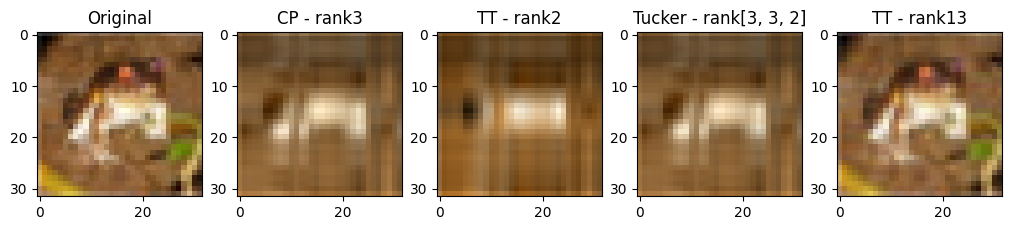

cp time: 0.17719721794128418
tt time: 0.0034017562866210938
tucker time: 0.022272348403930664
tt time: 0.003925800323486328


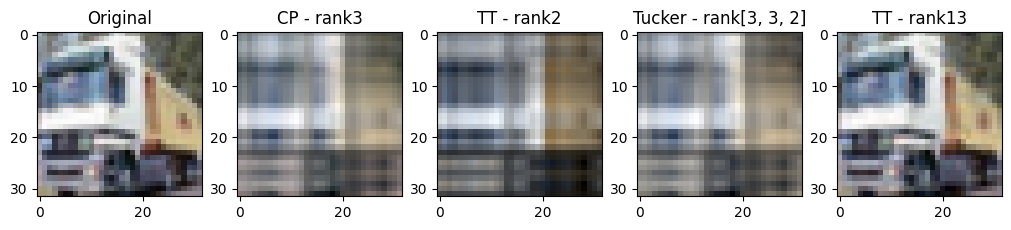

cp time: 0.3590376377105713
tt time: 0.005248069763183594
tucker time: 0.016610383987426758
tt time: 0.018085718154907227


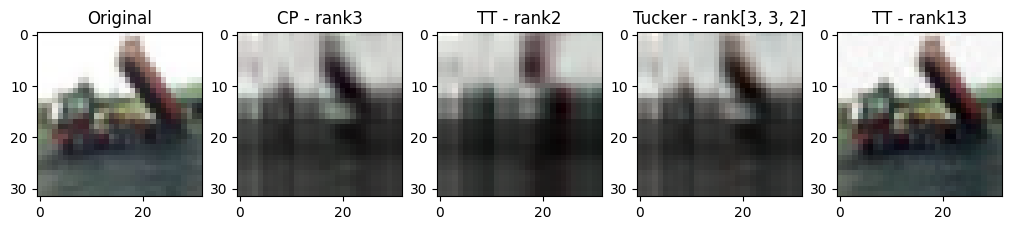

cp time: 0.19353723526000977
tt time: 0.0036554336547851562
tucker time: 0.01122140884399414
tt time: 0.003568887710571289


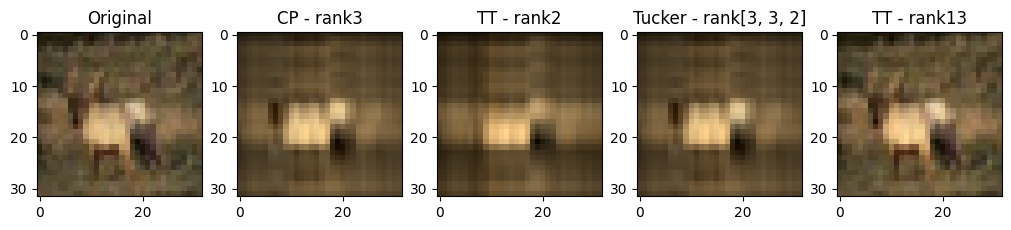

cp time: 0.16800308227539062
tt time: 0.0034325122833251953
tucker time: 0.017841339111328125
tt time: 0.0032901763916015625


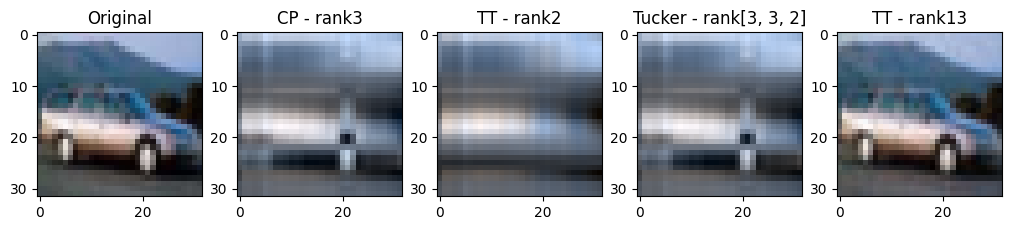

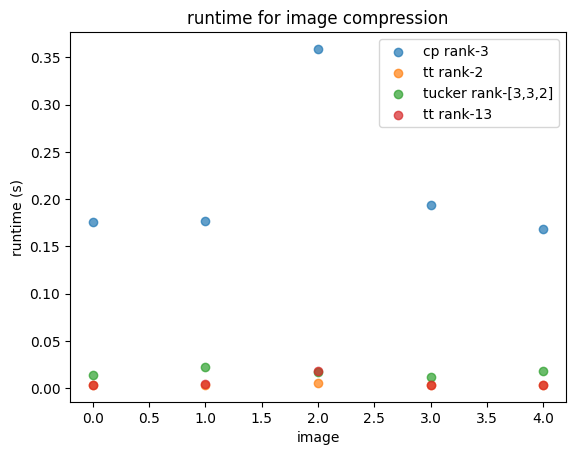

In [96]:
tucker_rank = [3, 3, 2]
cp_time = []
tt_time_1 = []
tucker_time = []
tt_time_2 = []

img_counter = 0
for img in x_train[0:5]:
  fig, axs = plt.subplots(1, 5, figsize=(10, 5), constrained_layout=True)

  axs[0].imshow(img)
  axs[0].set_title('Original')

  start = time.time()
  axs[1].imshow(compression(img, 3, 'cp'))
  axs[1].set_title('CP - rank{}'.format(3))
  duration = time.time()-start
  cp_time.append(duration)
  print('cp time: {}'.format(duration))

  start = time.time()
  tt_rank_1 = 2
  axs[2].imshow(compression(img, tt_rank_1, 'tt'))
  axs[2].set_title('TT - rank{}'.format(tt_rank_1))
  duration = time.time()-start
  tt_time_1.append(duration)
  print('tt time: {}'.format(duration))

  start = time.time()
  axs[3].imshow(compression(img, tucker_rank, 'tucker'))
  axs[3].set_title('Tucker - rank{}'.format(tucker_rank))
  duration = time.time()-start
  tucker_time.append(duration)
  print('tucker time: {}'.format(duration))


  tt_rank_2 = 13
  start = time.time()
  axs[4].imshow(compression(img, tt_rank_2, 'tt'))
  axs[4].set_title('TT - rank{}'.format(tt_rank_2))
  duration = time.time()-start
  tt_time_2.append(duration)
  print('tt time: {}'.format(duration))

  # Save reconstruction results
  img_name = f'reconstruction results for image no. {str(img_counter)}.png'
  plt.savefig(fname=img_name, format='png', dpi=400, bbox_inches='tight')
  plt.show()

  img_counter += 1

# Plot runtime for each image compression & reconstruction operation
plt.scatter(np.arange(5), cp_time, label='cp rank-3', alpha=0.7)
plt.scatter(np.arange(5), tt_time_1, label='tt rank-2', alpha=0.7)
plt.scatter(np.arange(5), tucker_time, label='tucker rank-[3,3,2]', alpha=0.7)
plt.scatter(np.arange(5), tt_time_2, label='tt rank-13', alpha=0.7)
plt.legend()
plt.xlabel('image')
plt.ylabel('runtime (s)')
plt.title('runtime for image compression')
plt.savefig('runtime for image compression', dpi=400, bbox_inches='tight')
plt.show()


In [85]:
# # Calculate the number of parameters

# tucker_rank = [3, 3, 2]
# tensor = x_train[1] # 32 x 32 x 3
# factors = tensor_train(tensor, rank=13)
# # core, factors = tucker(tensor, rank=tucker_rank, init='random')
# # tucker_reconstruction = tl.tucker_to_tensor((core, factors))
# # tensor_reconstruct = tl.tt_to_tensor(factors)
# print(len(factors))
# print(core.shape)
# print(factors[0].shape, factors[1].shape, factors[2].shape)
# print(factors[0].flatten().shape + factors[1].flatten().shape + factors[2].flatten().shape + core.flatten().shape)
# print(np.sum(factors[0].flatten().shape + factors[1].flatten().shape + factors[2].flatten().shape + core.flatten().shape))


In [86]:
# # Calculate the number of parameters

# 96+288+9, 32*32*3, 192+192+6, 160+480+9, 3*(32+32+3), 64+128+6, 160+160+6+50, 96+96+6+18

# # original
# print(32*32*3)
# # cp-rank3
# print(3*(32+32+3))
# # tt-rank2
# print(64+ 128+ 6 +18)
# # tucker-rank[3,3,2]
# print(96+96+6+18)
# # tt-rank13
# print(416+1248+9+18)